In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [55]:
# Linear Regression, Lasso, Ridge

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [24]:
SPY = pd.read_csv("SPY.csv")
SPY["Date"] = pd.to_datetime(SPY["Date"]) # change date entry to a datetime series
SPY.set_index("Date", inplace = True) # set this as index

# Exercise 1

- Plot raw time series data for Adj Close price.
- Make a histogram of the adjusted close 1-day percent difference (use pct_change()).
- Create the 5-day future price (as 5d_future_close).
- Create the % price change 5 days in the future (5d_close_future_pct), and the current
5-day % price change (5d_close_pct).
- Examine correlations between the two 5-day percent price change columns.
- Make a scatterplot of 5d_close_pct vs 5d_close_future_pct.

Text(0, 0.5, 'Adjusted Close')

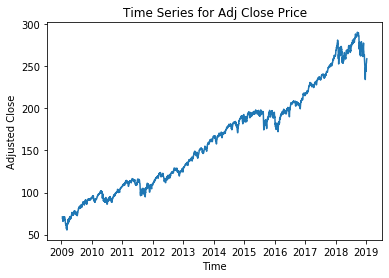

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(SPY["Adj Close"])
plt.title("Time Series for Adj Close Price")
plt.xlabel("Time")
plt.ylabel("Adjusted Close")

#plt.xticks(rotation=90);
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=36))

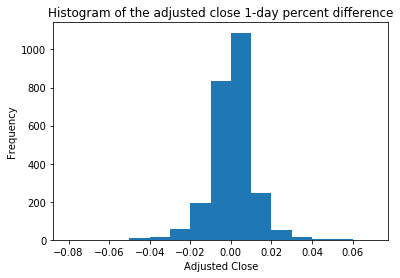

In [44]:
SPY["Adj Close Pct Change"] = SPY["Adj Close"].pct_change()
x = SPY["Adj Close Pct Change"].dropna()

binwidth = 0.01
bins = np.arange(round(x.min(),2)-binwidth,round(x.max(),2) + binwidth, binwidth)
plt.hist(x, bins = bins)

plt.title("Histogram of the adjusted close 1-day percent difference")
plt.ylabel("Frequency")
plt.xlabel("Adjusted Close");

In [52]:
#take the price 5d in the future and align with the current row
SPY["5d_future_close"] = SPY["Adj Close"].shift(-4) 


In [59]:
# Calculate the pct change of the 5d_future_close series
SPY["5d_close_future_pct"] = SPY["5d_future_close"].pct_change(periods=5)
SPY["5d_close_pct"] = SPY["Adj Close"].pct_change(periods=5)

In [60]:
print("Correlation between the current and the 5d future pct change is", SPY["5d_close_future_pct"].corr(SPY["5d_close_pct"]))

Correlation between the current and the 5d future pct change is 0.13380196013794107


Text(0, 0.5, '5d_close_future_pct')

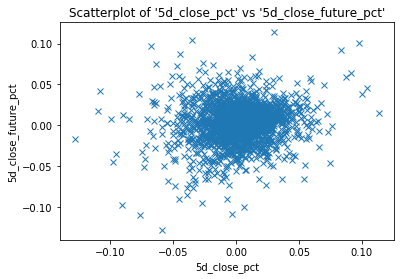

In [64]:
SPY_clean = SPY.dropna()
plt.plot(SPY_clean["5d_close_pct"], SPY_clean["5d_close_future_pct"], "x")

plt.title("Scatterplot of '5d_close_pct' vs '5d_close_future_pct'")
plt.xlabel("5d_close_pct")
plt.ylabel("5d_close_future_pct")

# Exercise 2
- Split data into a training set data.tr and a testing set data.te. The 75% of dataset should be used of training, the remaining are used for testing. In each of the following points, the models are to be fit to data.tr, the accuracy is to be analysed on both data.tr and data.te.
- Train a cross-validated lasso regression. Compute the sum of squares of error for both the training and testing set.
- Given the best fit models, list the relevant variables (the ones with non-zero coefficients). Run a simple linear regression using these input variables only. Compare the sum of squares of errors of this model to the best fit model of the previous part.
- Train the cross-validated Lasso model once with standardisation and once without it. Investigate the accuracy of the fits, and compare the lists of relevant variables of the two models. Interpret the outcome.
- Train the cross-validated ridge-regression model, investigate the value of coefficients for the whole range of the penalisation parameter, investigate the accuracy, display and compare the results.
- Plot figures showing how the selected coefficients for both lasso and ridge regressions vary when penalisation parameter Lambda is increasing. Interpret the plots by comparing the shrinkage effect of Lambda for both models.

In [89]:
Ex1data = pd.read_csv("Ex1data.csv")
Ex1data.set_index("Unnamed: 0", inplace = True)
data_tr, data_te = train_test_split(Ex1data, test_size = 0.25, random_state = 123)

In [31]:
llm = linear_model.LassoCV()
y = data_tr["V1"]
X = data_tr.drop('V1', axis=1)
Lasso_Regresson = llm.fit(X,y)

print(llm.coef_)

[-1.44289248 -0.75471457  0.0863388  -0.          1.08069049  0.
 -1.61819086  0.15291723 -0.22325872 -0.70924662  0.92893166 -0.03831756
  0.          0.09239487 -0.48746225  0.24662794 -1.51871213  0.36794376
 -0.          0.52110264 -0.          1.25135523  0.3364432   0.82988563
  0.39402653  1.30060931 -1.47621224  1.25709402 -1.11716167 -0.31198586]


/Users/Dominic/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [35]:
predict_tr = llm.predict(X)
predict_te = llm.predict(data_te.drop('V1', axis = 1))

print("MSE on training set is", mean_squared_error(y,predict_tr))
print("MSE on testing set is", mean_squared_error(data_te["V1"], predict_te))

# testing set has a much higher MSE.

MSE on training set is 4.601457564432628
MSE on testing set is 10.041370088169172


In [50]:
#print(llm.coef_)
selected_var = llm.coef_ != 0
selected_var = np.insert(selected_var,0,True) #include the observation too

Ex1data2 = Ex1data.iloc[:,selected_var]

In [52]:
data_tr2, data_te2 = train_test_split(Ex1data, test_size = 0.25, random_state = 123)

In [53]:
lm = linear_model.LinearRegression()
y2 = data_tr2["V1"]
X2 = data_tr2.drop('V1', axis=1)
Linear_Regression = lm.fit(X,y)

In [54]:
predict_tr2 = lm.predict(X2)
predict_te2 = lm.predict(data_te2.drop('V1', axis = 1))

print("MSE on training set is", mean_squared_error(y2,predict_tr2))
print("MSE on testing set is", mean_squared_error(data_te2["V1"], predict_te2))

MSE on training set is 4.085398393777861
MSE on testing set is 8.967452898132088


- The MSE is lower in the simple regression on selected variables on both test and train set compare to the MSE from Lasso Regression.
- The increase in MSE from training set to test set for the simple regression is also less, indicating the overfitting problem seems to be less of an issue when a simple regression on the selected variable is used.


In [103]:
#standardize predictors but not outcomes
standardizer = StandardScaler()
standardizer.fit(Ex1data.drop('V1', axis = 1))
Ex1data_std = pd.DataFrame(standardizer.transform(Ex1data.drop('V1', axis = 1)))
Ex1data_std.columns = (Ex1data.drop('V1', axis = 1)).columns #same column names
Ex1data_std.set_index(Ex1data.index, inplace = True) #same index names
Ex1data_std['V1'] = Ex1data['V1']

In [105]:
data_tr3, data_te3 = train_test_split(Ex1data_std, test_size = 0.25, random_state = 123)

llm3 = linear_model.LassoCV()
y3 = data_tr3["V1"]
X3 = data_tr3.drop('V1', axis=1)
Lasso_Regresson = llm3.fit(X3,y3)

predict_tr3 = lm.predict(X3)
predict_te3 = lm.predict(data_te3.drop('V1', axis = 1))

print("MSE on training set is", mean_squared_error(y3,predict_tr3))
print("MSE on testing set is", mean_squared_error(data_te3["V1"], predict_te3))

MSE on training set is 4.22147664451944
MSE on testing set is 9.663426975549902


/Users/Dominic/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


- The MSE is lower in the cross validated Lasso regression on standardize variables on both test and train set compare to the MSE from Cross Validated Lasso Regression with predictors that are not standardize.
- The MSE could be compared as the outcome are not standardize and only the predictors are.
- There seems to have a problem of overfitting in both models as the performance of the regressor on testing data set have very high discrepancy compare to the performance on training dataset.

In [109]:
print(llm.coef_)
print(llm3.coef_)

[-1.44289248 -0.75471457  0.0863388  -0.          1.08069049  0.
 -1.61819086  0.15291723 -0.22325872 -0.70924662  0.92893166 -0.03831756
  0.          0.09239487 -0.48746225  0.24662794 -1.51871213  0.36794376
 -0.          0.52110264 -0.          1.25135523  0.3364432   0.82988563
  0.39402653  1.30060931 -1.47621224  1.25709402 -1.11716167 -0.31198586]
[-1.5057129  -0.73617367  0.08900544 -0.          1.12196382  0.
 -1.59308488  0.16587113 -0.25020726 -0.67567302  0.88603898 -0.03448732
  0.          0.09884972 -0.46475348  0.23478748 -1.51171285  0.38130497
 -0.          0.53166512 -0.          1.3326048   0.32362564  0.81855475
  0.38884782  1.32405681 -1.39418703  1.28742021 -0.95395927 -0.30785758]


Although the values of the coefficient is different due to the scaling of the predictors, the selection of variables is the same, i.e. the variables with 0 coefficient is the same. This is likely to indicate that the variables selected might indeed have significant in predicting the value of the outcomes.

In [130]:
rlm = linear_model.RidgeCV()
y4 = data_tr["V1"]
X4 = data_tr.drop('V1', axis=1)
Ridge_Regresson = rlm.fit(X4,y4)

predict_tr4 = lm.predict(X4)
predict_te4 = lm.predict(data_te.drop('V1', axis = 1))

print("MSE on training set is", mean_squared_error(y4,predict_tr4))
print("MSE on testing set is", mean_squared_error(data_te["V1"], predict_te4))

print(rlm.coef_)

MSE on training set is 4.085398393777861
MSE on testing set is 8.967452898132088
[-1.3144897  -0.81288927  0.29813723 -0.04117264  0.96517342  0.15206062
 -1.44999172  0.26074379 -0.32021583 -0.7257929   0.98343574 -0.22351525
  0.17871888  0.22795307 -0.58148591  0.31090512 -1.48309214  0.54730322
 -0.0602788   0.58445535 -0.03356988  1.12402831  0.44074061  0.86418559
  0.4985741   1.26339107 -1.39917728  1.18857521 -0.95824248 -0.37631727]


- A lower MSE for compare to Lasso for both training and testing data set.
- Although there is no coefficient that shrink to zero.

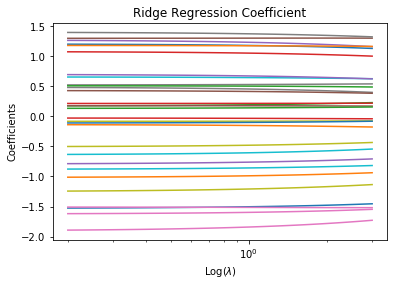

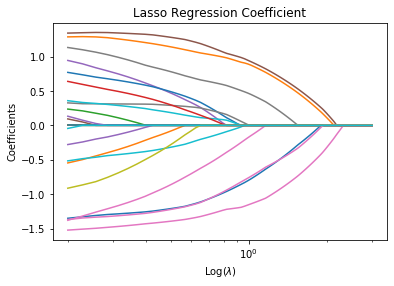

In [133]:
alphas = np.linspace(0.2, 3, 100)

Ridge_coef = np.zeros((30,100))
Lasso_coef = np.zeros((30,100))

for i in range(100):
    alpha = alphas[i]
    y4 = data_tr["V1"]
    X4 = data_tr.drop('V1', axis=1)
    rlm1 = linear_model.Ridge(alpha = alpha)
    Ridge_Regresson1 = rlm1.fit(X4,y4)
    llm1 = linear_model.Lasso(alpha = alpha)
    Lasso_Regresson1 = llm1.fit(X4,y4)
    
    Ridge_coef[:,i] = rlm1.coef_ 
    Lasso_coef[:,i] = llm1.coef_

plt.figure()  
plt.semilogx(alphas, np.transpose(Ridge_coef));
plt.title("Ridge Regression Coefficient")
plt.xlabel("Log($\lambda$)")
plt.ylabel("Coefficients")

plt.figure()
plt.title("Lasso Regression Coefficient")
plt.semilogx(alphas, np.transpose(Lasso_coef));
plt.xlabel("Log($\lambda$)")
plt.ylabel("Coefficients");

As penalty parameter increases, both coefficient does shrink towards 0, but Lasso regression is more apparent and the coefficient that shrunk to zero stays at zero.

# Exercise 3

In [ ]:
def housing_price_prediction(F, N, table1, T, table2):
    
    #assume table is numpy array
    y = table1[:,F]
    X = table1[:,:F]
    
    #compare the four following models
    llm = linear_model.LassoCV()
    Lasso_Regresson = llm.fit(X,y)
    
    rlm = linear_model.RidgeCV()
    Ridge_Regresson = rlm.fit(X,y)
    
    lm1 = linear_model.LinearRegression()
    Linear_Regresson = lm1.fit(X,y)
    
    X2 = X[:,llm.coef_ != 0]
    lm2 = linear_model.LinearRegression()
    Linear_Regresson = lm2.fit(X2,y)
    
    llm_predict = llm.predict(X)
    rlm_predict = rlm.predict(X)
    lm1_predict = lm1.predict(X)
    lm2_predict = lm2.predict(X2) 
    
    #compare MSE, take the one with the lowest MSE
    ix = 0 
    MSE = mean_squared_error(y,llm_predict)
    if mean_squared_error(y,rlm_predict) < MSE:
        MSE = mean_squared_error(y,rlm_predict)
        ix = 1
    if mean_squared_error(y,lm1_predict) < MSE:
        MSE = mean_squared_error(y,lm1_predict)
        ix = 2    
    if mean_squared_error(y,lm2_predict) < MSE:
        MSE = mean_squared_error(y,lm2_predict)
        ix = 3
    
    if ix == 0:
        linear_model = llm
    if ix == 1:
        linear_model = rlm
    if ix == 2:
        linear_model = lm1
    if ix == 3:
        linear_model = lm2
        table2 = table2[:,llm.coef_ != 0]
        
    return linear_model.predict(table2)